In [7]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

In [8]:
거래정보 = pd.read_csv("거래 정보.CSV", engine = 'python')

In [9]:
거래정보.columns = ['클라이언트ID', '거래ID', '거래일련번호', '업종단위', '상품소분류코드', '구매일자', '구매시각', '구매금액', '구매수량']

In [10]:
거래정보.drop(거래정보[거래정보['상품소분류코드'] == 'unknown'].index, inplace = True)

In [11]:
반복구매 = pd.read_csv("buy_repeat.CSV", engine = 'python')

In [12]:
반복구매.columns = ['클라이언트ID', '반복구매']

In [13]:
시간대 = pd.read_csv("6시간씩것.CSV", engine = 'python', encoding = 'utf-8')

In [14]:
시간대.drop('Unnamed: 0', axis = 1, inplace = True)

In [15]:
시간대.columns = ['클라이언트ID','0-6','12-18','18-24','6-12','max_frequency','주된 소비시간']

In [16]:
시간대_new = 시간대.loc[거래정보['클라이언트ID'].unique()]  # 이미 구매소비자만 뽑은 상태

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  """Entry point for launching an IPython kernel.


In [17]:
시간대_new = 시간대_new.dropna(axis = 0) # 4개 결측치 삭제

In [18]:
습관도 = pd.merge(시간대_new, 반복구매, on = '클라이언트ID', how = 'left')  # 없는 거는 0 넣으라고 했음

In [19]:
습관도 = 습관도.fillna(0)

In [20]:
관심도 = pd.read_csv("관심도.CSV", engine = 'python', encoding = 'utf-8-sig')

In [21]:
습관도 = pd.merge(습관도, 관심도, on = '클라이언트ID', how = 'left')  # 없는 거는 0 넣으라고 했음

In [22]:
습관도.head()

,클라이언트ID,0-6,12-18,18-24,6-12,max_frequency,주된 소비시간,반복구매,Unnamed: 0,세션일자1,...,세션일자5,세션일자6,세션일자7,세션일자8,세션일자9,세션일자10,세션일자11,세션일자12,세션일자13,관심도
0,39439.0,0.0,1.0,1.0,0.0,1.0,12-18,0.0,18864,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.153846
1,21289.0,0.0,238.0,144.0,179.0,238.0,12-18,15.0,16937,0.0,...,0.0,3.0,1.0,3.0,1.0,1.0,2.0,1.0,2.0,1.692308
2,48990.0,4.0,49.0,0.0,0.0,49.0,12-18,2.0,19902,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.230769
3,30547.0,0.0,4.0,20.0,1.0,20.0,18-24,0.0,25133,0.0,...,0.0,1.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,0.538462
4,64375.0,0.0,0.0,5.0,0.0,5.0,18-24,0.0,43679,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.230769


In [23]:
from tqdm import tqdm

In [24]:
std = []

for num in tqdm(range(0, len(습관도))):
    X = [습관도.iloc[num]['0-6'], 습관도.iloc[num]['12-18'], 습관도.iloc[num]['18-24'], 습관도.iloc[num]['6-12']]
    std.append(np.std(X))

100%|██████████| 11267/11267 [00:30<00:00, 365.22it/s]


In [25]:
습관도['시간집중도'] = std

In [26]:
습관도.head()

,클라이언트ID,0-6,12-18,18-24,6-12,max_frequency,주된 소비시간,반복구매,Unnamed: 0,세션일자1,...,세션일자6,세션일자7,세션일자8,세션일자9,세션일자10,세션일자11,세션일자12,세션일자13,관심도,시간집중도
0,39439.0,0.0,1.0,1.0,0.0,1.0,12-18,0.0,18864,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.153846,0.500000
1,21289.0,0.0,238.0,144.0,179.0,238.0,12-18,15.0,16937,0.0,...,3.0,1.0,3.0,1.0,1.0,2.0,1.0,2.0,1.692308,87.665201
2,48990.0,4.0,49.0,0.0,0.0,49.0,12-18,2.0,19902,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.230769,20.704770
3,30547.0,0.0,4.0,20.0,1.0,20.0,18-24,0.0,25133,0.0,...,1.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,0.538462,8.073878
4,64375.0,0.0,0.0,5.0,0.0,5.0,18-24,0.0,43679,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.230769,2.165064


In [27]:
온라인정보 = pd.read_csv("온라인 행동 정보.CSV", engine = 'python')

In [28]:
온라인정보.columns = ['클라이언트ID', '세션ID', '조회일련번호', '행동유형', '업종단위', 
                 '세션일자', '조회시각','조회경과시간', '거래ID', '검색 키워드',
                '총페이지조회건수', '총세션시간값', '유입채널', '기기유형']

In [29]:
거래까지조회경과시간 = 온라인정보[온라인정보['행동유형']== 6].pivot_table(index = ['클라이언트ID'], aggfunc = 'min', values = '조회경과시간').reset_index()

In [30]:
습관도 = pd.merge(습관도, 거래까지조회경과시간, on = '클라이언트ID', how = 'left')  # 없는 거는 0 넣으라고 했음

In [31]:
습관도 = 습관도.dropna(axis = 0)

In [32]:
습관도 = 습관도.reset_index()

In [33]:
습관도.isnull().sum()

index            0
클라이언트ID          0
0-6              0
12-18            0
18-24            0
6-12             0
max_frequency    0
주된 소비시간          0
반복구매             0
Unnamed: 0       0
세션일자1            0
세션일자2            0
세션일자3            0
세션일자4            0
세션일자5            0
세션일자6            0
세션일자7            0
세션일자8            0
세션일자9            0
세션일자10           0
세션일자11           0
세션일자12           0
세션일자13           0
관심도              0
시간집중도            0
조회경과시간           0
dtype: int64

In [34]:
습관도.drop(습관도[습관도['반복구매']>70].index, inplace = True)

In [35]:
습관도 = 습관도.reset_index()

In [36]:
습관도[['시간집중도', '반복구매', '관심도']]

,시간집중도,반복구매,관심도
0,87.665201,15.0,1.692308
1,20.704770,2.0,0.230769
2,8.073878,0.0,0.538462
3,1.299038,0.0,0.153846
4,0.433013,0.0,0.076923
5,68.776813,7.0,1.230769
6,56.228885,0.0,0.846154
7,2.598076,0.0,0.153846
8,12.298374,0.0,2.230769
9,2.291288,0.0,0.230769


### 스케일링

In [37]:
import matplotlib.pyplot  as plt
import seaborn as sns

In [38]:
import matplotlib as mpl

mpl.rcParams['font.family'].insert(0, 'Malgun Gothic')

In [39]:
from sklearn.preprocessing import MinMaxScaler

minMaxScaler = MinMaxScaler()
minMaxScaler.fit(습관도[['시간집중도', '반복구매', '관심도']])
train_data_minMaxScaled = minMaxScaler.transform(습관도[['시간집중도', '반복구매', '관심도']])

In [40]:
# RobustScaler
from sklearn.preprocessing import RobustScaler

robustScaler = RobustScaler()
robustScaler.fit(습관도[['시간집중도', '반복구매', '관심도']])
train_data_robustScaled = robustScaler.transform(습관도[['시간집중도', '반복구매', '관심도']])

In [41]:
MinMax_Scale = pd.DataFrame(train_data_minMaxScaled)

In [42]:
Robust_Scale = pd.DataFrame(train_data_robustScaled)

In [43]:
MinMax_Scale.columns = ['시간집중도_Min/Max_Scale', '반복구매_Min/Max_Scale', '관심도_Min/Max_Scale']

In [44]:
MinMax_Scale.head()

,시간집중도_Min/Max_Scale,반복구매_Min/Max_Scale,관심도_Min/Max_Scale
0,0.116665,0.234375,0.073944
1,0.027112,0.031250,0.007042
2,0.010219,0.000000,0.021127
3,0.001158,0.000000,0.003521
4,0.000000,0.000000,0.000000


In [45]:
Robust_Scale.columns = ['시간집중도_Robust_Scale', '반복구매_Robust_Scale', '관심도_Robust_Scale']

In [46]:
거래소비자__습관도 = pd.concat([습관도, MinMax_Scale, Robust_Scale], axis = 1)

In [47]:
거래소비자__습관도.head()

,level_0,index,클라이언트ID,0-6,12-18,18-24,6-12,max_frequency,주된 소비시간,반복구매,...,세션일자13,관심도,시간집중도,조회경과시간,시간집중도_Min/Max_Scale,반복구매_Min/Max_Scale,관심도_Min/Max_Scale,시간집중도_Robust_Scale,반복구매_Robust_Scale,관심도_Robust_Scale
0,0,1,21289.0,0.0,238.0,144.0,179.0,238.0,12-18,15.0,...,2.0,1.692308,87.665201,349404.0,0.116665,0.234375,0.073944,2.986601,3.75,1.8
1,1,2,48990.0,4.0,49.0,0.0,0.0,49.0,12-18,2.0,...,0.0,0.230769,20.704770,891922.0,0.027112,0.031250,0.007042,0.441365,0.50,-0.1
2,2,3,30547.0,0.0,4.0,20.0,1.0,20.0,18-24,0.0,...,0.0,0.538462,8.073878,2623385.0,0.010219,0.000000,0.021127,-0.038748,0.00,0.3
3,3,6,48210.0,0.0,0.0,2.0,3.0,3.0,6-12,0.0,...,0.0,0.153846,1.299038,42819.0,0.001158,0.000000,0.003521,-0.296267,0.00,-0.2
4,4,7,18488.0,0.0,0.0,1.0,0.0,1.0,18-24,0.0,...,0.0,0.076923,0.433013,520911.0,0.000000,0.000000,0.000000,-0.329185,0.00,-0.3


### 클러스터링

In [48]:
feature_MinMax_Scale= 거래소비자__습관도[ ['시간집중도_Min/Max_Scale', '반복구매_Min/Max_Scale','관심도_Min/Max_Scale' ]]
feature_MinMax_Scale.head()

,시간집중도_Min/Max_Scale,반복구매_Min/Max_Scale,관심도_Min/Max_Scale
0,0.116665,0.234375,0.073944
1,0.027112,0.031250,0.007042
2,0.010219,0.000000,0.021127
3,0.001158,0.000000,0.003521
4,0.000000,0.000000,0.000000


In [49]:
from sklearn.cluster import KMeans
import matplotlib.pyplot  as plt
import seaborn as sns

# create model and prediction
model = KMeans(n_clusters=4,algorithm='auto')
model.fit(feature_MinMax_Scale)
predict = pd.DataFrame(model.predict(feature_MinMax_Scale))
#print(predict)
predict.columns=['predict']  # predcit는 군집에 라벨링해주는 것
                             # 이 데이터는 군집0, 군집1, 군집2에 들어간다 

# concatenate labels to df as a new column
r = pd.concat([feature_MinMax_Scale,predict],axis=1)

print(r)

      시간집중도_Min/Max_Scale  반복구매_Min/Max_Scale  관심도_Min/Max_Scale  predict
0                0.116665            0.234375           0.073944        2
1                0.027112            0.031250           0.007042        0
2                0.010219            0.000000           0.021127        0
3                0.001158            0.000000           0.003521        0
4                0.000000            0.000000           0.000000        0
5                0.091404            0.109375           0.052817        2
6                0.074622            0.000000           0.035211        0
7                0.002896            0.000000           0.003521        0
8                0.015869            0.000000           0.098592        0
9                0.002485            0.000000           0.007042        0
10               0.002896            0.000000           0.003521        0
11               0.035012            0.265625           0.035211        2
12               0.018204            0

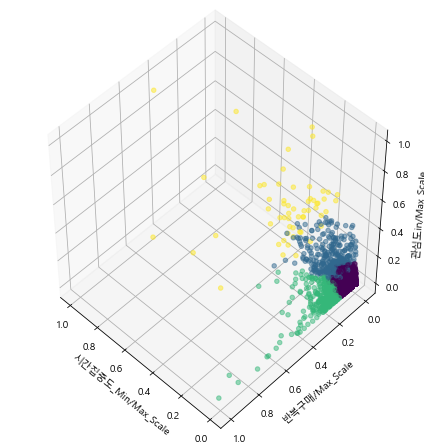

In [50]:
from mpl_toolkits.mplot3d import Axes3D
# scatter plot
fig = plt.figure( figsize=(6,6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter(r['시간집중도_Min/Max_Scale'],  r['반복구매_Min/Max_Scale'],r['관심도_Min/Max_Scale'],c=r['predict'],alpha=0.5)
ax.set_xlabel('시간집중도_Min/Max_Scale')
ax.set_ylabel('반복구매/Max_Scale')
ax.set_zlabel('관심도in/Max_Scale')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


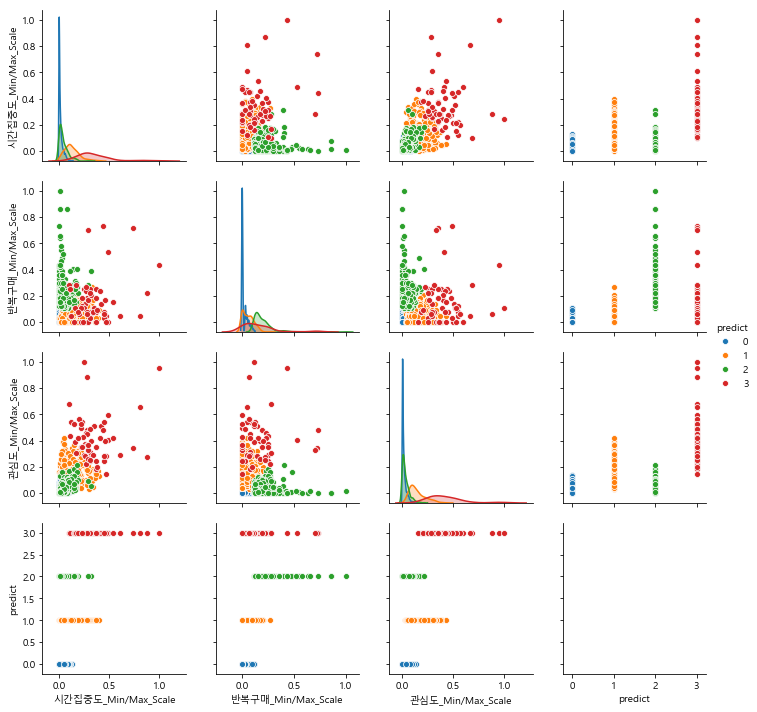

In [51]:
#pairplot with Seaborn
sns.pairplot(r, hue='predict')
plt.show()

In [52]:
ks = range(1, 10)

inertias = []
score = []

for k in ks:
    model = KMeans(n_clusters = k)
    model.fit(feature_MinMax_Scale)
    inertias.append(model.inertia_)  # inertia_=> 응집도 계산해주는 내장함수
    score.append(model.score(feature_MinMax_Scale))
    
inertias  # 응집도 값 계산
#score

[53.79762837897295,
 34.15739982689752,
 24.103114198380318,
 19.604559370266003,
 16.737021675746757,
 14.49887173585417,
 12.8388290848875,
 11.630098508855944,
 10.321212377848152]